In [86]:
import glob
import os
import pickle
import numpy as np

import astropy.units as u
from astropy.constants import k_B, m_p
from astropy.table import Table
from astropy.io import ascii
import pandas


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
#sns.set_style("whitegrid", {'axes.grid' : False})
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rcParams['font.size'] = 26.

h=0.695  # damn you little h!!


/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
h1_limit = 1.e13
si2_limit = 1.e11
c4_limit = 1.e12
si4_limit = 1.e13
o6_limit = 1.e13

simass = 28.0855
cmass = 12.0107
omass = 15.999

hi_color = 'salmon' ## '#984ea3' # purple
ovi_color = '#4daf4a'  # green
si2_color = '#984ea3' # 'darkorange'
c4_color = "#4575b4" # blue 'darkorange'
si4_color = "#4575b4" #'darkorange'

nref10_cell = 1000. * 100 / (256 * np.power(2,10)) ## ckpc/h

output_dir = '/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/clouds/'

### this will only work in python 3 !!
filelist = glob.glob(os.path.join('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/natural/spectra/lls', '*.pkl'))
# filelist = filelist[0:100]
print('there are ',np.size(filelist),'files')
natural_size_dict = pickle.load( open( filelist[0], "rb" ) )
print(natural_size_dict.keys())

natural_h1temps = []
natural_h1vc = []
natural_h1dv = []
natural_h1cloudcolumns = []

natural_o6temps = []
natural_o6vc = []
natural_o6dv = []
natural_o6cloudcolumns = []

natural_si2temps = []
natural_si2vc = []
natural_si2dv = []
natural_si2cloudcolumns = []

natural_c4temps = []
natural_c4vc = []
natural_c4dv = []
natural_c4cloudcolumns = []

natural_si4temps = []
natural_si4vc = []
natural_si4dv = []
natural_si4cloudcolumns = []

for file in filelist:
    natural_size_dict = pickle.load( open( file, "rb" ) )
    raydf = natural_size_dict['ray_df']
    if "rd0020" in file:
        z = 2.0
    if "rd0018" in file:
        z = 2.5
    ### make this limit different for each ion
    if (natural_size_dict['nh1'] > h1_limit):
        if np.max(natural_size_dict['h1_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(natural_size_dict['h1_coldens']):
                this_cloud = raydf[raydf['h1_cloud_flag'] == (i+1)]
                m = m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                natural_h1temps.append(T)
                natural_h1dv.append(dv)
                natural_h1vc.append(vc)
                natural_h1cloudcolumns.append(item)

    if (natural_size_dict['nsi2'] > si2_limit):
        if np.max(natural_size_dict['si2_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(natural_size_dict['si2_coldens']):
                this_cloud = raydf[raydf['si2_cloud_flag'] == (i+1)]
                m = omass * m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                natural_si2temps.append(T)
                natural_si2dv.append(dv)
                natural_si2vc.append(vc)
                natural_si2cloudcolumns.append(item)

    if (natural_size_dict['no6'] > o6_limit):
        if np.max(natural_size_dict['o6_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(natural_size_dict['o6_coldens']):
                this_cloud = raydf[raydf['o6_cloud_flag'] == (i+1)]
                m = simass * m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                natural_o6temps.append(T)
                natural_o6dv.append(dv)
                natural_o6vc.append(vc)
                natural_o6cloudcolumns.append(item)

    if (natural_size_dict['nc4'] > c4_limit):
        if np.max(natural_size_dict['c4_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(natural_size_dict['c4_coldens']):
                this_cloud = raydf[raydf['c4_cloud_flag'] == (i+1)]
                m = omass * m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                natural_c4temps.append(T)
                natural_c4dv.append(dv)
                natural_c4vc.append(vc)
                natural_c4cloudcolumns.append(item)



filelist = glob.glob(os.path.join('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/nref11n_nref10f_refine200kpc/spectra/lls', '*.pkl'))
# filelist = filelist[0:100]
print('there are ',np.size(filelist),'files')
nref10f_size_dict = pickle.load( open( filelist[0], "rb" ) )
print(nref10f_size_dict.keys())


nref10f_h1temps = []
nref10f_h1vc = []
nref10f_h1dv = []
nref10f_h1cloudcolumns = []

nref10f_o6temps = []
nref10f_o6vc = []
nref10f_o6dv = []
nref10f_o6cloudcolumns = []

nref10f_si2temps = []
nref10f_si2vc = []
nref10f_si2dv = []
nref10f_si2cloudcolumns = []

nref10f_c4temps = []
nref10f_c4vc = []
nref10f_c4dv = []
nref10f_c4cloudcolumns = []

nref10f_si4temps = []
nref10f_si4vc = []
nref10f_si4dv = []
nref10f_si4cloudcolumns = []

for file in filelist:
    nref10f_size_dict = pickle.load( open( file, "rb" ) )
    raydf = nref10f_size_dict['ray_df']
    if "rd0020" in file:
        z = 2.0
    if "rd0018" in file:
        z = 2.5
    ### make this limit different for each ion
    if (nref10f_size_dict['nh1'] > h1_limit):
        if np.max(nref10f_size_dict['h1_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(nref10f_size_dict['h1_coldens']):
                this_cloud = raydf[raydf['h1_cloud_flag'] == (i+1)]
                m = m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                nref10f_h1temps.append(T)
                nref10f_h1dv.append(dv)
                nref10f_h1vc.append(vc)
                nref10f_h1cloudcolumns.append(item)

    if (nref10f_size_dict['nsi2'] > si2_limit):
        if np.max(nref10f_size_dict['si2_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(nref10f_size_dict['si2_coldens']):
                this_cloud = raydf[raydf['si2_cloud_flag'] == (i+1)]
                m = omass * m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                nref10f_si2temps.append(T)
                nref10f_si2dv.append(dv)
                nref10f_si2vc.append(vc)
                nref10f_si2cloudcolumns.append(item)

    if (nref10f_size_dict['no6'] > o6_limit):
        if np.max(nref10f_size_dict['o6_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(nref10f_size_dict['o6_coldens']):
                this_cloud = raydf[raydf['o6_cloud_flag'] == (i+1)]
                m = simass * m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                nref10f_o6temps.append(T)
                nref10f_o6dv.append(dv)
                nref10f_o6vc.append(vc)
                nref10f_o6cloudcolumns.append(item)

    if (nref10f_size_dict['nc4'] > c4_limit):
        if np.max(nref10f_size_dict['c4_coldens']) < 200:
            ## loop through the clouds
            for i, item in enumerate(nref10f_size_dict['c4_coldens']):
                this_cloud = raydf[raydf['c4_cloud_flag'] == (i+1)]
                m = omass * m_p
                dv = (np.max(['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['c4_coldens'] / sum(this_cloud['c4_coldens'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                nref10f_c4temps.append(T)
                nref10f_c4dv.append(dv)
                nref10f_c4vc.append(vc)
                nref10f_c4cloudcolumns.append(item)




there are  600 files
dict_keys(['c4_kpcsizes', 'no6', 'o6_indices', 'si2_kpcsizes', 'si2_indices', 'o6_velocities', 'nsi2', 'o6_n_cells', 'coldens_threshold', 'si2_velocities', 'h1_coldens', 'h1_indices', 'h1_cell_masses', 'si2_xs', 'h1_kpcsizes', 'nh1', 'o6_cell_masses', 'c4_xs', 'ray_df', 'c4_velocities', 'si2_centers', 'o6_centers', 'c4_indexsizes', 'c4_coldens', 'si2_cell_masses', 'o6_indexsizes', 'c4_indices', 'o6_xs', 'nc4', 'si2_indexsizes', 'o6_kpcsizes', 'h1_n_cells', 'o6_coldens', 'si2_n_cells', 'c4_n_cells', 'si2_coldens', 'h1_indexsizes', 'h1_xs', 'c4_cell_masses', 'h1_velocities', 'c4_centers', 'h1_centers'])
there are  600 files
dict_keys(['c4_velocities', 'si2_cell_masses', 'no6', 'si2_kpcsizes', 'si2_centers', 'nsi2', 'o6_kpcsizes', 'coldens_threshold', 'si2_coldens', 'si2_indices', 'h1_indices', 'h1_cell_masses', 'o6_n_cells', 'o6_centers', 'si2_velocities', 'h1_kpcsizes', 'nh1', 'o6_cell_masses', 'c4_xs', 'ray_df', 'c4_kpcsizes', 'o6_indices', 'h1_coldens', 'c4_colden

32     4.839025e+20
33     4.839025e+20
34     4.839025e+20
35     4.839025e+20
36     4.839025e+20
37     4.839025e+20
38     4.839025e+20
39     4.839025e+20
40     4.839025e+20
41     4.839025e+20
42     4.839025e+20
43     4.839025e+20
44     4.839025e+20
45     4.839025e+20
46     4.839025e+20
47     4.839025e+20
48     4.839025e+20
49     4.839025e+20
50     4.839025e+20
51     4.839025e+20
52     4.839025e+20
53     4.839025e+20
54     4.839025e+20
55     4.839025e+20
56     4.839025e+20
57     4.839025e+20
58     4.839025e+20
59     4.839025e+20
60     4.839025e+20
61     4.839025e+20
           ...     
463    4.839025e+20
464    4.839025e+20
465    4.839025e+20
466    4.839025e+20
467    4.839025e+20
468    4.839025e+20
469    4.839025e+20
470    4.839025e+20
471    4.839025e+20
472    4.839025e+20
473    4.839025e+20
474    4.839025e+20
475    4.839025e+20
476    4.839025e+20
477    4.839025e+20
478    4.839025e+20
479    4.839025e+20
480    4.839025e+20
481    4.839025e+20


In [91]:
filelist = glob.glob(os.path.join('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/natural/spectra/lls', '*.pkl'))

natural_o6temps = []
natural_o6vc = []
natural_o6dv = []
natural_o6_cloud_cells = []
natural_o6cloudcolumns = []
for file in filelist:
    natural_size_dict = pickle.load( open( file, "rb" ) )
    raydf = natural_size_dict['ray_df']
    if "rd0020" in file:
        z = 2.0
    if "rd0018" in file:
        z = 2.5
    ### make this limit different for each ion
    if (natural_size_dict['no6'] > o6_limit):
        if np.max(natural_size_dict['o6_kpcsizes']) < 200:
            ## loop through the clouds
            for i, item in enumerate(natural_size_dict['o6_coldens']):
                this_cloud = raydf[raydf['o6_cloud_flag'] == (i+1)]
                m = m_p
                dv = (np.max(this_cloud['z-velocity']) -
                      np.min(this_cloud['z-velocity'])) * u.km / u.s
                T = np.sum(this_cloud['temperature'] * this_cloud['cell_mass'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                natural_o6temps.append(T.value)
                natural_o6dv.append(dv.value)
                natural_o6vc.append(vc.value)
                natural_o6_cloud_cells.append(len(this_cloud))
                natural_o6cloudcolumns.append(item)

nat = Table()
nat['o6temps'] = natural_o6temps
nat['o6dv'] = natural_o6dv
nat['o6vc'] = natural_o6vc
nat['o6_cloud_cells'] = natural_o6_cloud_cells
nat['o6cloudcloumns'] = natural_o6cloudcolumns
nat['o6_sampling'] = np.array(natural_o6dv) / np.array(natural_o6vc)

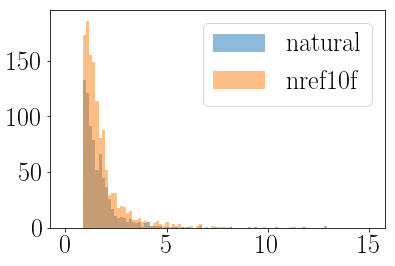

In [52]:
plt.hist(np.array(natural_h1dv) / np.array(natural_h1vc),100,range=(0,15),alpha=0.5,label='natural')
plt.hist(np.array(nref10f_h1dv) / np.array(nref10f_h1vc),100,range=(0,15),alpha=0.5,label='nref10f')
plt.legend()

In [130]:
filelist = glob.glob(os.path.join('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/nref11n_nref10f_refine200kpc/spectra/lls', '*.pkl'))

nref10f_o6temps = []
nref10f_o6vc = []
nref10f_o6dv = []
nref10f_o6cloudcolumns = []
nref10f_o6_cloud_cells = []
for file in filelist:
    nref10f_size_dict = pickle.load( open( file, "rb" ) )
    raydf = nref10f_size_dict['ray_df']
    if "rd0020" in file:
        z = 2.0
    if "rd0018" in file:
        z = 2.5
    if "axx" in file:
        this_velocity = 'x-velocity'
    elif "axy" in file:
        this_velocity = 'y-velocity'
    elif "axz" in file:
        this_velocity = 'z-velocity'
    ### make this limit different for each ion
    if (natural_size_dict['no6'] > o6_limit):
        if np.max(natural_size_dict['o6_kpcsizes']) < 200:
            ## loop through the clouds
            for i, item in enumerate(natural_size_dict['o6_coldens']):
                this_cloud = raydf[raydf['o6_cloud_flag'] == (i+1)]
                m = simass * m_p
                dv = (np.max(this_cloud[this_velocity]) -
                      np.min(this_cloud[this_velocity])) * u.km / u.s
                T = sum(this_cloud['temperature'] * this_cloud['o6'] / sum(this_cloud['cell_mass'])) * u.K
                vc = np.sqrt(2*k_B*T / m).to('km/s')
                natural_o6temps.append(T)
                natural_o6dv.append(dv)
                natural_o6vc.append(vc)
                natural_o6cloudcolumns.append(item)


z-velocity
z-velocity
z-velocity
z-velocity
y-velocity
z-velocity
z-velocity
y-velocity
y-velocity
y-velocity
x-velocity
x-velocity
z-velocity
y-velocity
y-velocity
x-velocity
y-velocity
z-velocity
x-velocity
x-velocity
z-velocity
y-velocity
z-velocity
z-velocity
z-velocity
x-velocity
x-velocity
y-velocity
y-velocity
y-velocity
x-velocity
y-velocity
y-velocity
y-velocity
x-velocity
y-velocity
x-velocity
z-velocity
z-velocity
y-velocity
y-velocity
y-velocity
x-velocity
z-velocity
x-velocity
y-velocity
x-velocity
x-velocity
x-velocity
x-velocity
y-velocity
y-velocity
z-velocity
x-velocity
z-velocity
y-velocity
y-velocity
x-velocity
x-velocity
y-velocity
z-velocity
x-velocity
x-velocity
z-velocity
x-velocity
z-velocity
z-velocity
z-velocity
z-velocity
z-velocity
y-velocity
z-velocity
z-velocity
y-velocity
y-velocity
y-velocity
z-velocity
y-velocity
z-velocity
y-velocity
x-velocity
z-velocity
y-velocity
y-velocity
x-velocity
y-velocity
x-velocity
z-velocity
x-velocity
x-velocity
y-velocity

In [92]:
nat['simulation'] = 'standard'
ref['simulation'] = 'refined'
nat_p = nat.to_pandas()
ref_p = ref.to_pandas()
frames = [nat_p, ref_p]
both_p = pandas.concat(frames)


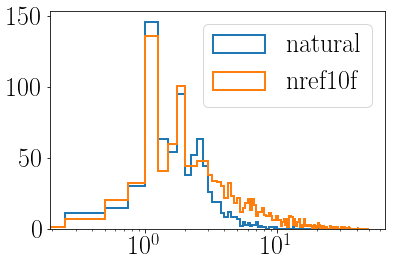

In [56]:
plt.hist(natural_h1_cloud_cells / (np.array(natural_h1dv) / np.array(natural_h1vc)),200,range=(0,50),histtype='step', lw=2, label='natural')
plt.hist(nref10f_h1_cloud_cells / (np.array(nref10f_h1dv) / np.array(nref10f_h1vc)),200,range=(0,50),histtype='step', lw=2, label='nref10f')
plt.xscale('log')
plt.legend()

In [47]:
plt.hist(natural_h1_cloud_cells,100,range=(0,100),alpha=0.5,label='natural')
plt.hist(nref10f_h1_cloud_cells,100,range=(0,100),alpha=0.5,label='nref10f')
plt.legend()

{'c4_cell_masses': [6.1555970178620836e+38],
 'c4_centers': [82.06045480338386],
 'c4_coldens': [1427143481979308.2],
 'c4_indexsizes': [2],
 'c4_indices': [51],
 'c4_kpcsizes': [6.103515625],
 'c4_n_cells': 2,
 'c4_velocities': [73.22273864482275],
 'c4_xs': [77.37919921875225],
 'coldens_threshold': 0.8,
 'h1_cell_masses': [6.1555970178620836e+38],
 'h1_centers': [82.17563736670411],
 'h1_coldens': [1.170697423020378e+16],
 'h1_indexsizes': [2],
 'h1_indices': [51],
 'h1_kpcsizes': [6.103515625],
 'h1_n_cells': 2,
 'h1_velocities': [73.22273864482275],
 'h1_xs': [77.37919921875225],
 'nc4': 1445041818894111.0,
 'nh1': 1.2584090300325818e+16,
 'no6': 537919298748505.8,
 'nsi2': 8520517462563.779,
 'o6_cell_masses': [1.1812227694323331e+37,
  3.0429251607230498e+38,
  1.0183987739270005e+38],
 'o6_centers': [91.9624385634154, 86.53447265625223, 77.37919921875225],
 'o6_coldens': [108775120591719.22, 83376375905647.81, 306782428436284.7],
 'o6_indexsizes': [3, 1, 1],
 'o6_indices': [47,

/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


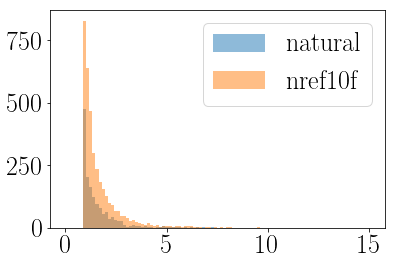

In [59]:
plt.hist(np.array(natural_o6dv) / np.array(natural_o6vc),100,range=(0,15),alpha=0.5,label='natural')
plt.hist(np.array(nref10f_o6dv) / np.array(nref10f_o6vc),100,range=(0,15),alpha=0.5,label='nref10f')
plt.legend()

3687 1546


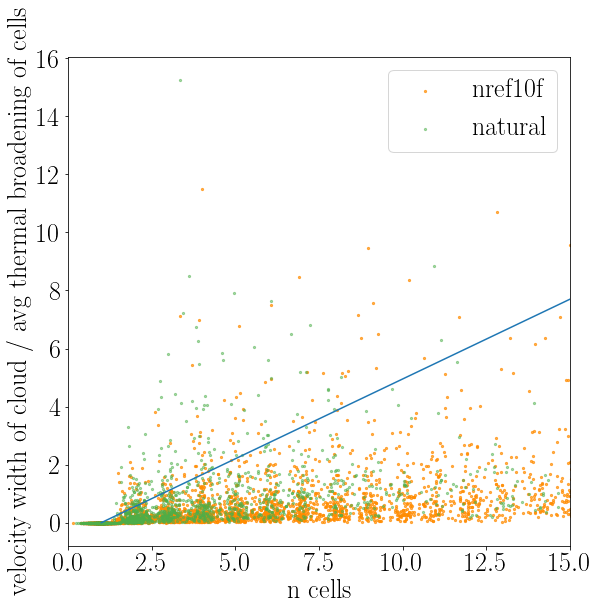

In [108]:
ref_color = 'darkorange' ###  r'#4575b4' # purple
nat_color = r'#4daf4a' # green
palette = sns.blend_palette((nat_color, ref_color),n_colors=2)

fig = plt.figure(figsize=(9,9))
#g = sns.swarmplot(x="o6_cloud_cells", y="o6_sampling", data=both_p, hue='simulation', palette=palette, alpha=0.7,orient='v')
print(len(nref10f_o6_cloud_cells), len(natural_o6_cloud_cells))
plt.scatter((np.random.normal(0,0.25,size=len(nref10f_o6_cloud_cells)) + nref10f_o6_cloud_cells), (np.array(nref10f_o6dv) / np.array(nref10f_o6vc)), s=5, alpha=0.7, color=ref_color, label='nref10f')
plt.scatter((np.random.normal(0,0.25,size=len(natural_o6_cloud_cells)) + natural_o6_cloud_cells), (np.array(natural_o6dv) / np.array(natural_o6vc)),s=5, alpha=0.5, color=nat_color, label='natural')
plt.plot((1,15),(0,(15-1)*0.55))
#plt.xscale('log')
plt.xlim(0,15)
plt.xlabel('n cells')
plt.ylabel('velocity width of cloud / avg thermal broadening of cells')
plt.legend()

3687 1546


/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


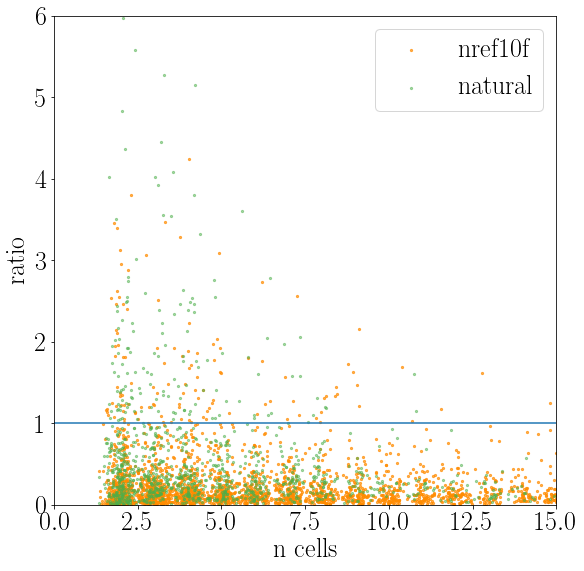

In [112]:
ratio_ref = (np.array(nref10f_o6dv) / np.array(nref10f_o6vc)) / ((np.array(nref10f_o6_cloud_cells) - 1)*0.55)
ratio_nat = (np.array(natural_o6dv) / np.array(natural_o6vc)) / ((np.array(natural_o6_cloud_cells) - 1)*0.55)

fig = plt.figure(figsize=(9,9))
#g = sns.swarmplot(x="o6_cloud_cells", y="o6_sampling", data=both_p, hue='simulation', palette=palette, alpha=0.7,orient='v')
print(len(nref10f_o6_cloud_cells), len(natural_o6_cloud_cells))
plt.scatter((np.random.normal(0,0.25,size=len(nref10f_o6_cloud_cells)) + nref10f_o6_cloud_cells), ratio_ref, s=5, alpha=0.7, color=ref_color, label='nref10f')
plt.scatter((np.random.normal(0,0.25,size=len(natural_o6_cloud_cells)) + natural_o6_cloud_cells), ratio_nat,s=5, alpha=0.5, color=nat_color, label='natural')
plt.plot((0,15),(1,1))
#plt.xscale('log')
plt.xlim(0,15)
plt.ylim(0,6)
plt.xlabel('n cells')
plt.ylabel('ratio')
plt.legend()

/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid 

0.2115135834411384
0.09438567941415785


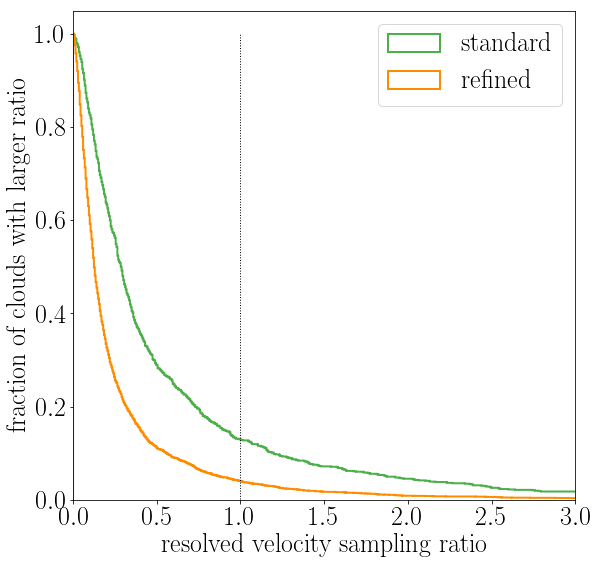

In [127]:
fig = plt.figure(figsize=(9,9))
plt.hist(ratio_nat,5000,range=(0,25),lw=2,cumulative=-1,normed=True,histtype='step',color=nat_color,label='standard')
plt.hist(ratio_ref,5000,range=(0,25),lw=2,cumulative=-1,normed=True,histtype='step',color=ref_color,label='refined')
plt.plot((1,1),(1.e-3,1),lw=1,color='black',ls=':')
plt.xlim(0,3)
#plt.yscale('log')
plt.legend()
plt.xlabel('resolved velocity sampling ratio')
plt.ylabel('fraction of clouds with larger ratio')
print(len(ratio_nat[ratio_nat > 0.5])/len(ratio_nat))
print(len(ratio_ref[ratio_ref > 0.5])/len(ratio_ref))

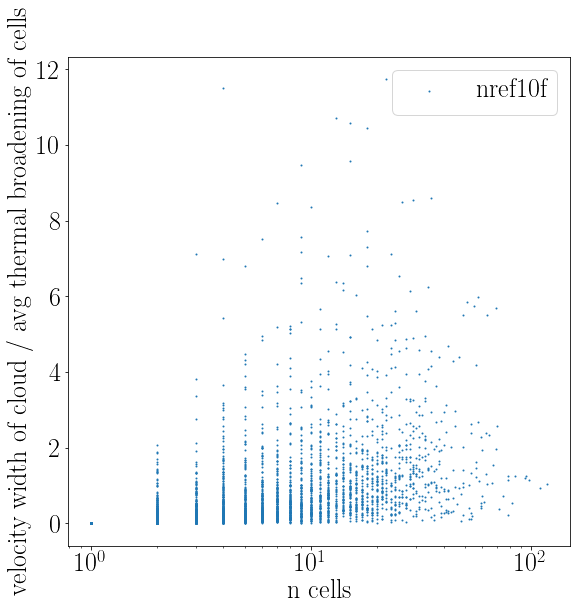

In [79]:
fig = plt.figure(figsize=(9,9))
#plt.scatter(natural_o6_cloud_cells, (np.array(natural_o6dv) / np.array(natural_o6vc)),s=1,  label='natural')
plt.scatter(nref10f_o6_cloud_cells, (np.array(nref10f_o6dv) / np.array(nref10f_o6vc)), s=1, label='nref10f')
plt.xscale('log')
plt.xlabel('n cells')
plt.ylabel('velocity width of cloud / avg thermal broadening of cells')
plt.legend()

In [ ]:
    natural_h1_ratio = np.array(natural_h1_sampling)  / ((np.array(natural_h1_cloud_cells) - 1)*0.55)
    natural_si2_ratio = np.array(natural_si2_sampling)  / ((np.array(natural_si2_cloud_cells) - 1)*0.55)
    natural_c4_ratio = np.array(natural_c4_sampling)  / ((np.array(natural_c4_cloud_cells) - 1)*0.55)
    natural_o6_ratio = np.array(natural_o6_sampling)  / ((np.array(natural_o6_cloud_cells) - 1)*0.55)
